In [31]:
import pandas as pd
import math
import os 
import numpy as np

In [32]:
ticker_mean_returns = {}
ticker_sd_returns = {}
ticker_returns = {}
for file in os.listdir():
    if not file.endswith('.csv'):
        continue
    ticker_data = pd.read_csv(file)
    
    
    ticker_data['Monthly Return'] = ticker_data['Close'].pct_change() 
    #ticker.dropna(inplace=True)
    ticker_returns[f'{file[:-4]}'] = ticker_data[['Date','Monthly Return']].copy(deep=True)


    ticker_monthly_return_mean = ticker_data['Monthly Return'].mean()
    ticker_monthly_return_sd = (ticker_data['Monthly Return'] - ticker_monthly_return_mean).abs().mean()
    
    ticker_mean_returns[f'{file[:-4]}'] = ticker_monthly_return_mean
    ticker_sd_returns[f'{file[:-4]}'] = ticker_monthly_return_sd 
print(ticker_mean_returns)
print(ticker_sd_returns)



{'AAPL': 0.023112508604323387, 'ABNB': 0.00421082120076829, 'ADBE': 0.014823772968949246, 'ELF': 0.05731601224981594, 'LRCX': 0.02468945617421844, 'NVDA': 0.06256613345221891, 'PYPL': -0.002704613515295192, 'RBLX': -0.0002812422655750435, 'SHOP': 0.03456330445767218, 'TSLA': 0.0632689560399196, 'TTD': 0.037353808126425504}
{'AAPL': 0.09359306865985144, 'ABNB': 0.09843244218542171, 'ADBE': 0.08118276395359862, 'ELF': 0.1159451321924056, 'LRCX': 0.11478840803082548, 'NVDA': 0.11756772487889917, 'PYPL': 0.0895467741541874, 'RBLX': 0.16303278268879995, 'SHOP': 0.1321817610703955, 'TSLA': 0.17635834366567882, 'TTD': 0.14031373665275312}


In [33]:
correlation_coefficients = {}
for file_1 in os.listdir():
    if not file_1.endswith('.csv'):
        continue
    for file_2 in os.listdir():
        if not file_2.endswith('.csv'):
            continue

        if file_1 == file_2:
            continue
    
        df_1 = ticker_returns[f'{file_1[:-4]}']
        

        df_2 = ticker_returns[f'{file_2[:-4]}']
        
        aligned_df = df_1.join(df_2, how='inner', lsuffix='_df1', rsuffix='_df2')

        correlation_coefficient = aligned_df['Monthly Return_df1'].corr(aligned_df['Monthly Return_df2'])
        
        correlation_coefficients[f'{file_1[:-4]} and {file_2[:-4]}'] = correlation_coefficient



correlation_coefficients



    
    

{'AAPL and ABNB': 0.18075547130877545,
 'AAPL and ADBE': 0.20909289357175437,
 'AAPL and ELF': 0.07089985592650999,
 'AAPL and LRCX': 0.4115062245501308,
 'AAPL and NVDA': 0.179598175345822,
 'AAPL and PYPL': 0.14801419949109396,
 'AAPL and RBLX': -0.17249892417453155,
 'AAPL and SHOP': 0.16934502156088665,
 'AAPL and TSLA': 0.23861281300325976,
 'AAPL and TTD': 0.11929614793277271,
 'ABNB and AAPL': 0.18075547130877548,
 'ABNB and ADBE': -0.11450472584817475,
 'ABNB and ELF': -0.018299666301601313,
 'ABNB and LRCX': 0.2433147642071071,
 'ABNB and NVDA': -0.15747845287424758,
 'ABNB and PYPL': -0.08557031507452306,
 'ABNB and RBLX': 0.12643963589478466,
 'ABNB and SHOP': -0.0751631278666437,
 'ABNB and TSLA': -0.10566091541244008,
 'ABNB and TTD': -0.03724897324634486,
 'ADBE and AAPL': 0.20909289357175437,
 'ADBE and ABNB': -0.11450472584817477,
 'ADBE and ELF': 0.3164225693653585,
 'ADBE and LRCX': 0.18238191329755507,
 'ADBE and NVDA': 0.6311838207628966,
 'ADBE and PYPL': 0.4886199

In [34]:
random_numbers = np.random.random(11)
weights = random_numbers / random_numbers.sum()


In [35]:
tickers = ['AAPL', 'ABNB', 'ADBE', 'ELF', 'LRCX', 'NVDA', 'PYPL', 'RBLX', 'SHOP', 'TSLA', 'TTD']



def get_portfolio_variance(weights):
    portfolio_var = 0
    for i in range(11):

        current_sum = math.pow(weights[0],2) * math.pow(ticker_mean_returns[tickers[i]],2)


        
        
        for j in range(11):
            if i == j:
                continue
            current_sum += (weights[i]*weights[j]*ticker_mean_returns[tickers[i]]*ticker_mean_returns[tickers[j]]
                            *correlation_coefficients[f'{tickers[i]} and {tickers[j]}'])
            
        
        
        portfolio_var += current_sum
    return portfolio_var




portfolio_var = get_portfolio_variance(weights)



    

In [36]:
expected_portfolio_sd = portfolio_var**(1/2)
expected_portfolio_sd

0.016753771600487546

In [37]:
ticker_mean_returns

{'AAPL': 0.023112508604323387,
 'ABNB': 0.00421082120076829,
 'ADBE': 0.014823772968949246,
 'ELF': 0.05731601224981594,
 'LRCX': 0.02468945617421844,
 'NVDA': 0.06256613345221891,
 'PYPL': -0.002704613515295192,
 'RBLX': -0.0002812422655750435,
 'SHOP': 0.03456330445767218,
 'TSLA': 0.0632689560399196,
 'TTD': 0.037353808126425504}

In [38]:

def get_portfolio_return(weights):
    expected_return = 0
    for weight,ticker in zip(weights,tickers):
        expected_return += weight*ticker_mean_returns[ticker]
    return expected_return

expected_portfolio_return = get_portfolio_return(weights)

expected_portfolio_return

0.027031917759680342

In [39]:
assumed_risk_free_rate = 0.02/12

In [40]:
sharpe_ratio = (expected_portfolio_return-assumed_risk_free_rate)/expected_portfolio_sd
sharpe_ratio

1.5140024406370403

In [41]:
def get_sharpe_ratio(weights):
    expected_portfolio_sd = get_portfolio_variance(weights) ** (1/2)
    return (expected_portfolio_return-assumed_risk_free_rate)/expected_portfolio_sd

In [42]:
best_sharp_ratio = 0
best_weights = []
sharpe_ratios = []
for i in range(1000000):
    random_numbers = np.random.random(11)
    weights = random_numbers / random_numbers.sum()

    if any(weight > 0.25 for weight in weights):
        continue
    
    sharpe_ratio = get_sharpe_ratio(weights)

    sharpe_ratios.append(sharpe_ratio)

    if sharpe_ratio > best_sharp_ratio:
        best_sharp_ratio = sharpe_ratio
        best_weights = weights 



    

In [43]:
np.mean(sharpe_ratios)

1.3672082214547059

In [44]:
best_sharp_ratio

4.914436695069688

In [45]:

    

stock_weights_df = pd.DataFrame({'Ticker':[ticker for ticker in tickers],'Weights': [weight for weight in best_weights]})

stock_weights_df.to_csv('stock_weights.csv',index = False)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

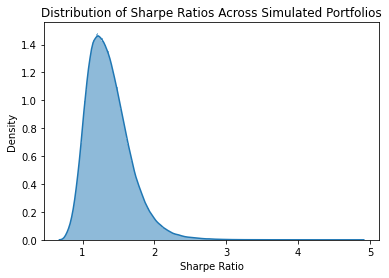

In [47]:
# Create the distribution plot
sns.histplot(sharpe_ratios, kde=True, stat="density", linewidth=0)

# Adding labels and title for clarity
plt.xlabel('Sharpe Ratio')
plt.ylabel('Density')
plt.title('Distribution of Sharpe Ratios Across Simulated Portfolios')

# Display the plot
plt.show()